### Lead Scoring Case Study
### Problem Statement : 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  
 
This case study aims to to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Our Goals in this Case Study is:
- To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- To adjust to if the company's requirement changes in the future so you will need to handle these as well.


#### Below steps will be followed to create model -
- Read and understand the data
- Data Cleaning
- Data Preparation
- Model Building
- Model Evaluation
- Making Predictions on the Test Set

### importing libraries

In [542]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [543]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
pd.set_option('max_column', None)

## Importing and Understanding the data

In [544]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [545]:
lead.shape

(9240, 37)

In [546]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [547]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Droping duplicate records

In [548]:
lead = lead.drop_duplicates()

In [549]:
lead.shape

(9240, 37)

- Shape of the dataset is same as earlier that means there are no duplicate records present in the dataset.

## Data Cleaning

### - Handeling 'Select' category

In [550]:
# Fetching columns which have value "Select"
lead[lead.columns[lead.iloc[0]== 'Select']]

,Specialization,How did you hear about X Education,Lead Profile,City
0,Select,Select,Select,Select
1,Select,Select,Select,Select
2,Business Administration,Select,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,Select,Other,Select,Mumbai
...,...,...,...,...
9235,IT Projects Management,Select,Potential Lead,Mumbai
9236,Media and Advertising,Select,Potential Lead,Mumbai
9237,Business Administration,Select,Potential Lead,Mumbai
9238,Human Resource Management,Online Search,NaN,Other Metro Cities


In [551]:
# As suggested by business that Select values are as good as null value, replacing all the Select with null
lead = lead.replace('Select',np.nan)

In [552]:
# verifying Select has been replaced.
(lead[lead.columns[lead.iloc[0]== 'Select']]).shape

(9240, 0)

### - Handelling null values

In [553]:
# Finding out the percentage of null values in columns
(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- Considering a threshold of 40% all the columns with null/missing values above 40% can be dropped.
- Columns How did you hear about X Education,Lead Profile,Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index , Asymmetrique Activity Score
and Asymmetrique Profile Score have null values more than 40%..
- Columns Prospect ID and Lead Number won't help making any decision so these columns can also be dropped.

In [554]:
drop_columns = lead[["How did you hear about X Education","Lead Profile","Prospect ID", "Lead Number", 
                     "Lead Quality", "Asymmetrique Activity Index", "Asymmetrique Profile Index" , 
                     "Asymmetrique Activity Score", "Asymmetrique Profile Score"]]
drop_columns

,How did you hear about X Education,Lead Profile,Prospect ID,Lead Number,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,NaN,NaN,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Low in Relevance,02.Medium,02.Medium,15.0,15.0
1,NaN,NaN,2a272436-5132-4136-86fa-dcc88c88f482,660728,NaN,02.Medium,02.Medium,15.0,15.0
2,NaN,Potential Lead,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Might be,02.Medium,01.High,14.0,20.0
3,Word Of Mouth,NaN,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Not Sure,02.Medium,01.High,13.0,17.0
4,Other,NaN,3256f628-e534-4826-9d63-4a8b88782852,660681,Might be,02.Medium,01.High,15.0,18.0
...,...,...,...,...,...,...,...,...,...
9235,NaN,Potential Lead,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,High in Relevance,02.Medium,01.High,15.0,17.0
9236,NaN,Potential Lead,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Might be,02.Medium,01.High,14.0,19.0
9237,NaN,Potential Lead,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Not Sure,02.Medium,01.High,13.0,20.0
9238,Online Search,NaN,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,NaN,02.Medium,02.Medium,15.0,16.0


In [555]:
lead = lead.drop(drop_columns,axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [556]:
lead.shape

(9240, 28)

### - Analysing binary catagorical features

In [557]:
lead["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [558]:
lead["Magazine"].value_counts()

No    9240
Name: Magazine, dtype: int64

In [559]:
lead["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [560]:
lead["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [561]:
lead["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [562]:
lead[ "Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [563]:
lead["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [564]:
lead['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [565]:
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [566]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [567]:
lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [568]:
lead['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [569]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [570]:
lead['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

- Since for columns Magazine, Newspaper Article, X Education Forums,Newspaper, Digital Advertisement, Through Recommendations, Do Not Email, Do Not Call,Receive More Updates About Our Courses,Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque, most of the records have value "NO", it is not going to make any difference with decision making. So these columns can be dropped.

In [571]:
No_columns = lead[["Search","Magazine", "Newspaper Article", "X Education Forums","Newspaper", 
                   "Digital Advertisement", "Through Recommendations",'Do Not Email', 'Do Not Call',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content', 'I agree to pay the amount through cheque']]
No_columns

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Do Not Email,Do Not Call,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
0,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,No,No,No,No,No,No,No,Yes,No,No,No,No,No
9236,No,No,No,No,No,No,No,No,No,No,No,No,No
9237,No,No,No,No,No,No,No,Yes,No,No,No,No,No
9238,No,No,No,No,No,No,No,No,No,No,No,No,No


In [572]:
lead = lead.drop(No_columns,axis=1)
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


In [573]:
lead.shape

(9240, 15)

## Data Imputation

### - Handeling null values below threshold range

In [574]:
(100*(lead.isnull().sum()/len(lead))).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [575]:
# creating a function to get null values and values counts for columns
def null_val_cnt(col):
    value_cnt = lead[col].value_counts(dropna=False)
    print ("Value counts for",col,":\n",value_cnt,"\n\n")

In [576]:
columns = lead[['City', 'Specialization', 'Tags', 'What matters most to you in choosing a course',
                   'What is your current occupation', 'Country', 'TotalVisits', 'Page Views Per Visit',
                   'Last Activity','Lead Source']]
for col in columns:
    null_val_cnt(col)

Value counts for City :
 NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64 


Value counts for Specialization :
 NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management             

- For column 'City' null value count is greater than mode so we can could a new category Others for the null values. But this column already has a category Other cities, merging null values with this category may mis lead our analysis , so we can drop this column.
- Similarly for column 'Specialization' and 'Tags' null value count is greater than mode so we can create a new category Others for the null values.
- As columnn 'What matters most to you in choosing a course' has 99% records values as better career perspective, it would not make any impact on decision making. we can drop this column.
- Column 'What is your current occupation' column has 85% values as unemployed, replacing null values with this value will make it more biased. so we can drop this column too.
- Column 'Country' is has 29% null values and 95% values of the column is India. This column has biased values and converting null values to mode will make more biased so we will drop this column.
- Column 'TotalVisits' has only 1.48%, Column 'Page Views Per Visit' has only 1.48% null values present so we can replace it with mean, Column 'Last Activity' has only 1.11% null values and Column 'Lead Source' has only 0.39 % null values present which is not going to make huge impact on analysis , so we can drop these rows.

In [577]:
lead['City'].fillna(value='Other_City', inplace=True)

In [578]:
lead.City.value_counts()

Other_City                     3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [579]:
# merging Other Cities categorie to Other_City
lead.City = lead.City.replace('Other Cities','Other_City')
lead.City.value_counts()

Other_City                     4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [580]:
lead['Country'].fillna(value='Other_Country', inplace=True)

In [581]:
# merging all low frequency categories with other_country for Country 
low_frequncy_vals = ['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom',
                     'Australia', 'Qatar', 'Bahrain', 'Hong Kong', 'Oman','France', 'unknown', 'Kuwait',
                     'South Africa', 'Canada', 'Nigeria', 'Germany','Sweden', 'Philippines', 'Uganda', 'Italy',
                     'Bangladesh', 'Netherlands','Asia/Pacific Region', 'China', 'Belgium', 'Ghana', 'Kenya', 
                     'Sri Lanka', 'Tanzania', 'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 
                     'Vietnam','Indonesia']

lead.Country = lead.Country.replace(low_frequncy_vals,'Other_Country')

In [582]:
lead.Country.value_counts()

India            6492
Other_Country    2748
Name: Country, dtype: int64

#### dropping columns

In [583]:
#null_cols = lead[['City','What matters most to you in choosing a course','Country']]

lead = lead.drop('What matters most to you in choosing a course',axis=1)

In [584]:
lead.shape

(9240, 14)

####  Replacing null values with new category

In [585]:
lead['Specialization'].fillna(value='Others_Specs', inplace=True)

lead['Tags'].fillna(value='Others_Tags', inplace=True)

lead['What is your current occupation'].fillna(value='Others_Occu', inplace=True)

In [586]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [587]:
# merging low frequency categories for feature Last Activity
low_frequncy_vals = ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                     'View in browser link Clicked', 'Email Marked Spam','Email Received',
                     'Resubscribed to emails','Visited Booth in Tradeshow']

lead['Last Activity'] = lead['Last Activity'].replace(low_frequncy_vals,'Others')

#### Dropping records with null values 

In [588]:
lead = lead[~lead['TotalVisits'].isnull()]

In [589]:
lead.shape

(9103, 14)

In [590]:
lead['Page Views Per Visit'].isnull().sum()

0

In [591]:
lead['Last Activity'].isnull().sum()

0

In [592]:
lead['Lead Source'].isnull().sum()

29

In [593]:
lead = lead[~lead['Lead Source'].isnull()]

In [594]:
lead.shape

(9074, 14)

In [595]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Country,Others_Specs,Unemployed,Interested in other courses,Other_City,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others_Specs,Unemployed,Ringing,Other_City,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others_Specs,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### - Handeling  Outliers 

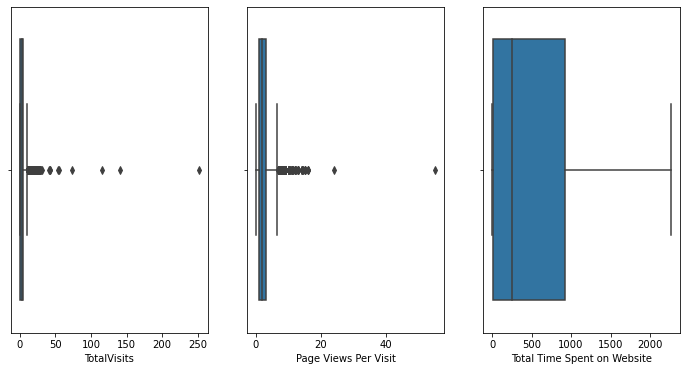

In [596]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(data=lead, x='TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data=lead, x='Page Views Per Visit')

plt.subplot(1,3,3)
sns.boxplot(data=lead, x='Total Time Spent on Website')

plt.show()

- Since first two columns are not equally distributed and have outliers present we'll replace null values with median.Also the outliers need to be handeled.
- 3rd column seems to be equally distributed.

In [597]:
# To handle outliers we will consider values till 99 percntile.
lead[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']].describe(percentiles=[0,.05,.25, .5, .75, .95, .99])

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
count,9074.000000,9074.000000,9074.000000
mean,2.370151,3.456028,482.887481
std,2.160871,4.858802,545.256560
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000
50%,2.000000,3.000000,246.000000
75%,3.200000,5.000000,922.750000
95%,6.000000,10.000000,1557.000000


In [598]:
percentile = lead['TotalVisits'].quantile([.05,.99]).values
percentile

array([ 0., 17.])

In [599]:
lead.shape

(9074, 14)

In [600]:
# limiting dataset to 99 percentile of column TotalVisits 
lead = lead[lead['TotalVisits'] <= np.percentile(lead['TotalVisits'],99)]

In [601]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Country,Others_Specs,Unemployed,Interested in other courses,Other_City,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others_Specs,Unemployed,Ringing,Other_City,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others_Specs,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [602]:
lead.shape

(8991, 14)

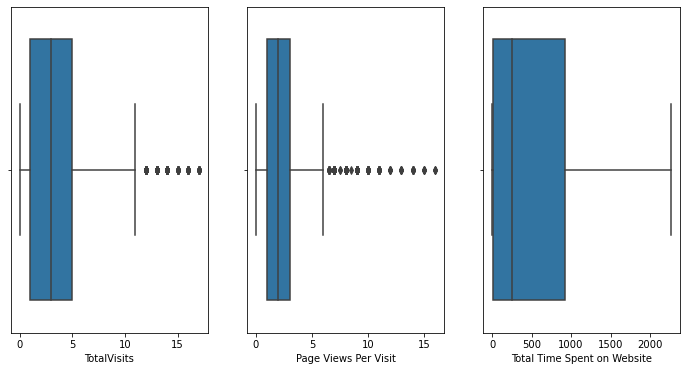

In [603]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(data=lead, x='TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data=lead, x='Page Views Per Visit')

plt.subplot(1,3,3)
sns.boxplot(data=lead, x='Total Time Spent on Website')

plt.show()

In [604]:
lead[['Page Views Per Visit','TotalVisits']].describe(percentiles=[0,.05,.25, .5, .75, .95, .99])

,Page Views Per Visit,TotalVisits
count,8991.000000,8991.000000
mean,2.344587,3.217106
std,2.061548,2.989530
min,0.000000,0.000000
0%,0.000000,0.000000
5%,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
95%,6.000000,9.000000


- maximum value for column Page Views Per Visit also seems fine so we don't need any further imputation.

## Visualizing the data

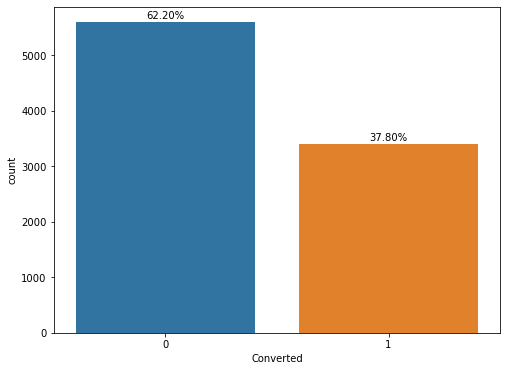

In [605]:
plt.figure(figsize=(8,6))
ax1 = sns.countplot(data=lead, x='Converted')
for p1 in ax1.patches:
        ax1.annotate("{:.2f}%".format(100 * p1.get_height()/len(lead)), 
                     (p1.get_x() + p1.get_width()/2, p1.get_height() + 30), ha = 'center', va = 'bottom')


- We have conversion rate of 38.54%.

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

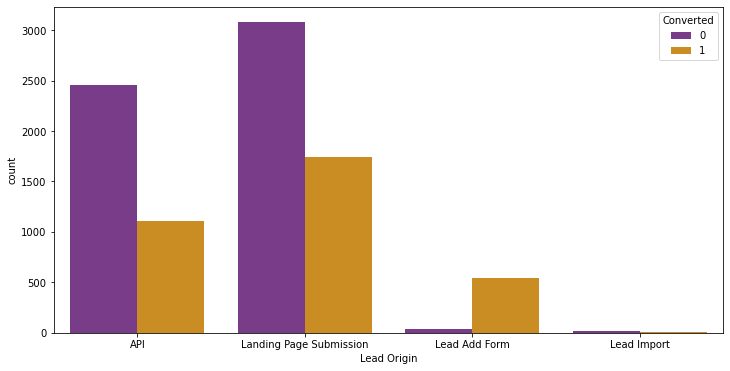

In [606]:
plt.figure(figsize=(12,6))
sns.countplot(data=lead, x='Lead Origin', hue = 'Converted',palette='CMRmap')

- customer who was identified to be a lead by Landing Page Submission seems to be converted most into paying customers. This feature seems to make an impact on our analysis.

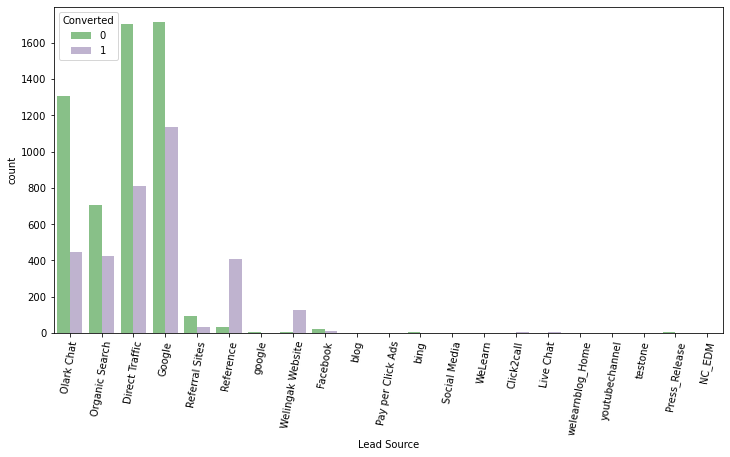

In [607]:
plt.figure(figsize=(12,6))
sns.countplot(data=lead, x='Lead Source', hue = 'Converted',palette='Accent')
plt.xticks(rotation=80)
plt.show()

- Leads whose came through reference had the maximum conversion ratio. Apart from that few leads from who came through google or direct traffic also got converted into paying customers. This feature seems to make an impact on our analysis.

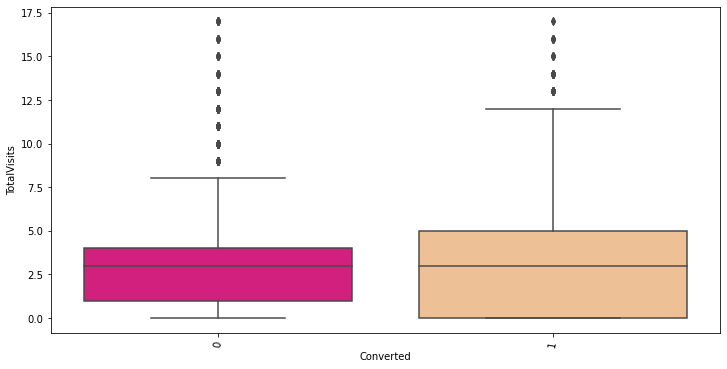

In [608]:
plt.figure(figsize=(12,6))
sns.boxplot(data=lead, y='TotalVisits', x = 'Converted',palette='Accent_r')
plt.xticks(rotation=80)
plt.show()

- Leads with high number of visits to page are not likely to convert intopaying customers.

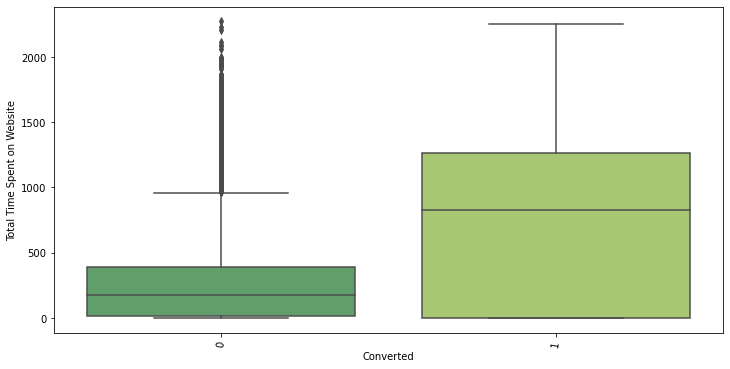

In [609]:
plt.figure(figsize=(12,6))
sns.boxplot(data=lead, x = 'Converted',y='Total Time Spent on Website',palette='summer')
plt.xticks(rotation=80)
plt.show()

- Leads who spend more time on website are most likely to convert into paying customers.

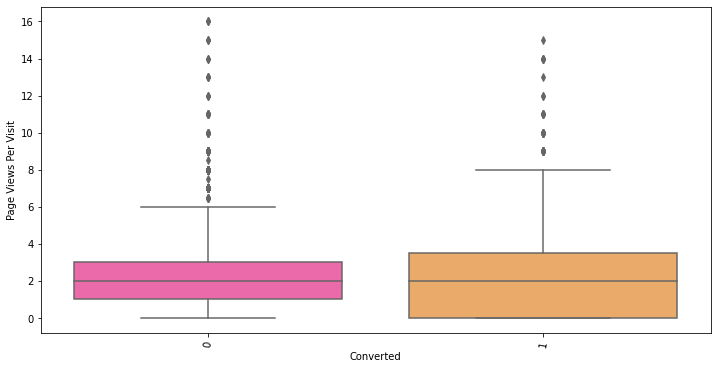

In [610]:
plt.figure(figsize=(12,6))
sns.boxplot(data=lead, x = 'Converted',y='Page Views Per Visit',palette='spring')
plt.xticks(rotation=80)
plt.show()

- Customers who visit page more are most likely to convert into paying customers.

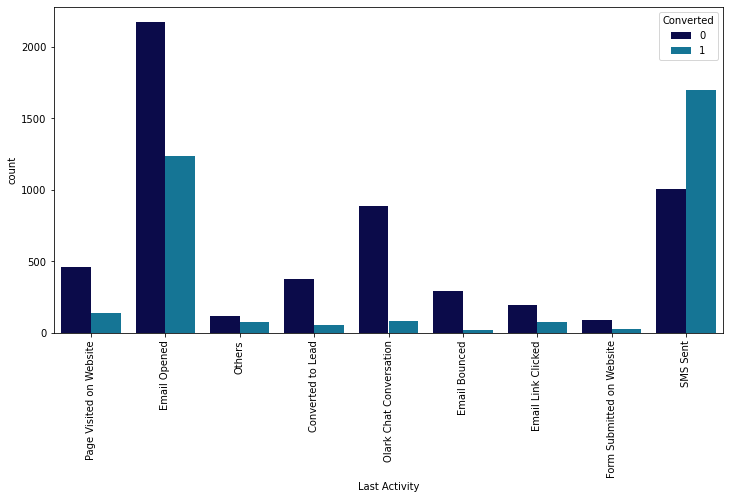

In [611]:
plt.figure(figsize=(12,6))
sns.countplot(data=lead, x='Last Activity', hue = 'Converted',palette='ocean')
plt.xticks(rotation=90)
plt.show()

- Lead with Email Opened or SMS Sent were the most who converted into paying customers.

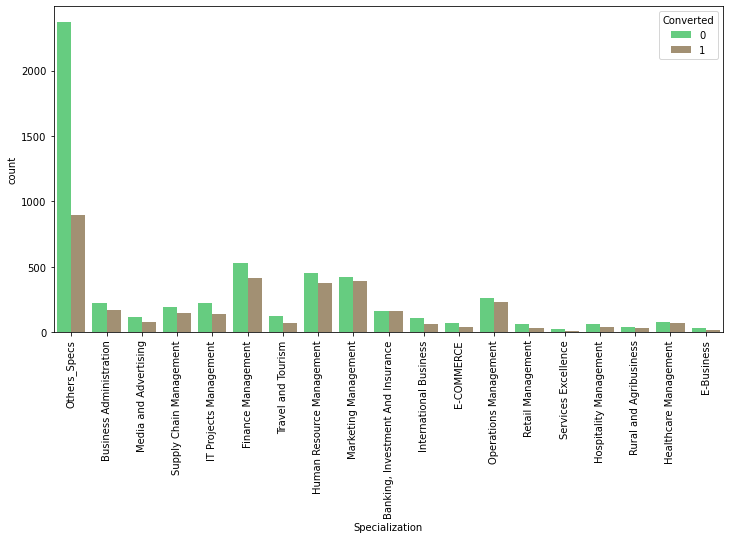

In [612]:
plt.figure(figsize=(12,6))
sns.countplot(data=lead, x='Specialization', hue = 'Converted',palette='terrain')
plt.xticks(rotation=90)
plt.show()

- Most of the leads did not mention their specialization. Rest were mostly from management field.

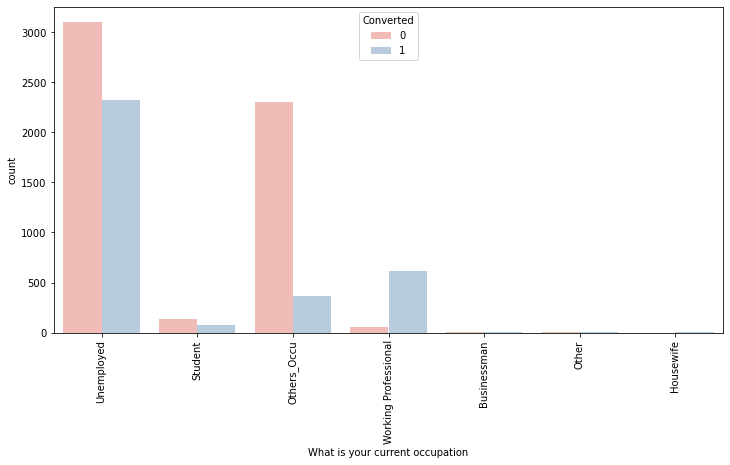

In [613]:
plt.figure(figsize=(12,6))
sns.countplot(data=lead, x='What is your current occupation', hue = 'Converted',palette='Pastel1')
plt.xticks(rotation=90)
plt.show()

- Most of the Leads who were unemployed converted into paying customers.

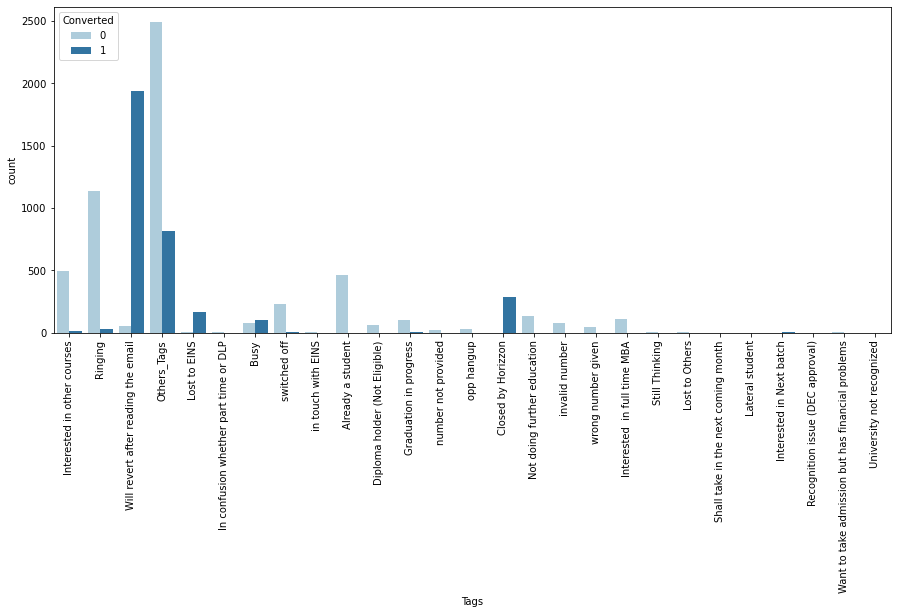

In [614]:
plt.figure(figsize=(15,6))
sns.countplot(data=lead, x='Tags', hue = 'Converted',palette='Paired')
plt.xticks(rotation=90)
plt.show()

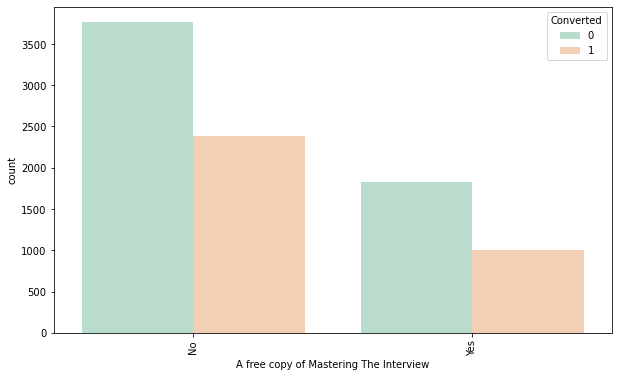

In [615]:
plt.figure(figsize=(10,6))
sns.countplot(data=lead, x='A free copy of Mastering The Interview', hue = 'Converted',palette='Pastel2')
plt.xticks(rotation=90)
plt.show()

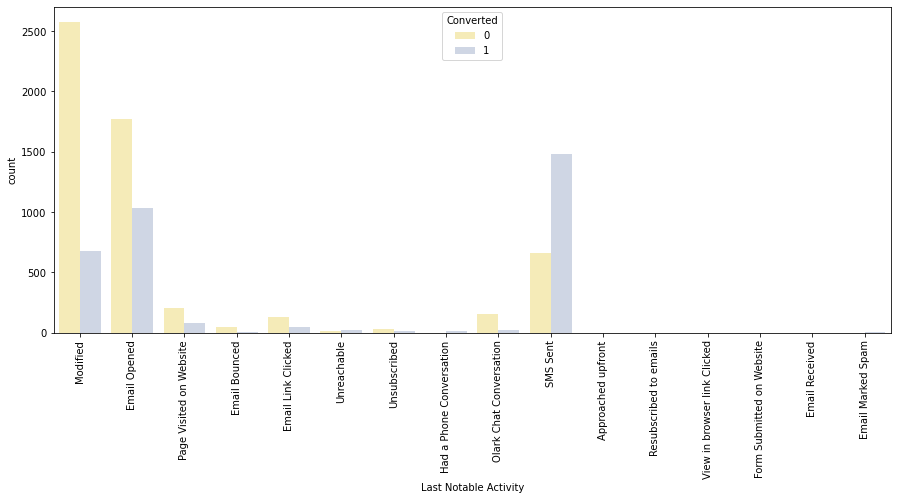

In [616]:
plt.figure(figsize=(15,6))
sns.countplot(data=lead, x='Last Notable Activity', hue = 'Converted',palette='Pastel2_r')
plt.xticks(rotation=90)
plt.show()

- Leads for whom last notable activity was either modified, Email Opened or SMS Sent , converted into paying customers.
- Previously we analysed that leads whose Last Activity was Email Opened or SMS Sent, converted into paying customers. Since both of these columns have same categories we can drop on of these columns.

In [617]:
#plt.figure(figsize=(15,6))
#sns.linetplot(data=lead, x='City', y= Convertedhue = 'Converted',palette='Pastel2_r')
#plt.xticks(rotation=90)
#plt.show()

<AxesSubplot:>

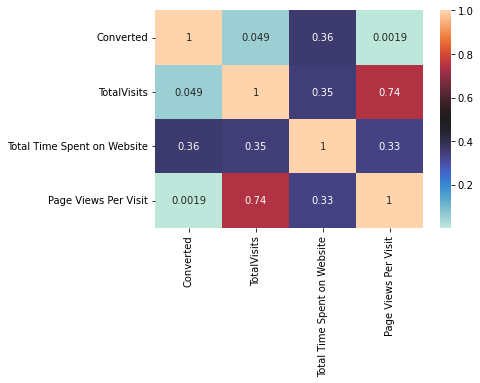

In [618]:
sns.heatmap(lead.corr(), annot=True, cmap='icefire')

In [619]:
#lead = lead.drop('Last Activity',axis=1)
#lead.head()

In [620]:
lead.shape

(8991, 14)

## Data Preparation

### - Converting binary features (Yes/No) to (0/1)

In [621]:
# Converting Yes and No values to 0 and 1
lead[['A free copy of Mastering The Interview']] = \
                    lead[['A free copy of Mastering The Interview']].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [622]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Country,Others_Specs,Unemployed,Interested in other courses,Other_City,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others_Specs,Unemployed,Ringing,Other_City,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others_Specs,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### - Dummy variable creation

In [623]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [624]:
# list of categorical features for which we need to create dummy variables
cat_var = lead[['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                'What is your current occupation','Tags','City','Last Notable Activity']]

In [625]:
# creating dummy variables
dummy_data = pd.get_dummies(cat_var)
dummy_data

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [626]:
#Creating a new dataset by concatenating lead dataset and dummy_data
lead_new = pd.concat([lead, dummy_data],axis=1)
lead_new.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Country,Others_Specs,Unemployed,Interested in other courses,Other_City,0,Modified,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [627]:
lead_new.shape

(8991, 125)

In [628]:
#dropping redundant columns
lead_new = lead_new.drop(cat_var,axis=1)
lead_new.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1

In [629]:
lead_new.shape

(8991, 116)

## Model Building

### Train Test Split

In [630]:
import sklearn
from sklearn.model_selection import train_test_split

In [631]:
X = lead_new.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,

In [632]:
y = lead_new['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [633]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [634]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6293, 115)
(2698, 115)
(6293,)
(2698,)


#### - Identifying the features which have higher correations

In [635]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.342496,0.737769,0.265872,-0.298516,0.419422,-0.249759,-0.053375,0.008306,0.106975,-0.053375,0.204749,-0.019216,0.015630,-0.475535,0.288916,NaN,0.033912,-0.217849,0.089620,-0.004458,-0.005239,-0.117445,-0.006665,0.003109,0.020830,0.007282,-0.005239,0.003109,-0.094898,-0.071282,-0.032421,0.044315,0.027330,-0.195729,0.047081,0.215606,0.029888,0.545287,-0.545287,0.074503,0.053804,0.020384,0.039720,0.090773,0.037039,0.027041,0.090242,0.052648,0.065037,0.044293,0.082902,0.034

### - Rescaling the features

In [636]:
# importing libraries 
from sklearn.preprocessing import StandardScaler

In [637]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Other_Country,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others_Specs,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others_Occu,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Other_City,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,4.0,894,4.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
108,6.0,398,3.00,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7858,11.0,126,

In [638]:
# Using Standard scaler for feature scaling
num_vars = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

Scaler = StandardScaler()

X_train[num_vars] = Scaler.fit_transform(X_train[num_vars])

### - Feature selection using RFE

In [639]:
#importing all necessary libraries 
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [640]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [641]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 62),
 ('A free copy of Mastering The Interview', False, 69),
 ('Lead Origin_API', False, 81),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Source_Click2call', False, 70),
 ('Lead Source_Direct Traffic', False, 39),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 98),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 77),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Pay per Click Ads', False, 100),
 ('Lead Source_Press_Release', False, 72),
 ('Lead Source_Reference', False, 89),
 ('Lead Source_Referral Sites', False, 93),
 ('Lead Source_Social Media', False, 75),
 ('Lead Source_WeLearn', False, 94),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 76),
 ('Lead Source_b

In [642]:
col = X_train.columns[rfe.support_]

In [643]:
X_train_rfe = X_train[col]

In [644]:
# adding constant to X_train variables and checking p-values
lead_log1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
res = lead_log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1353.4
Date:                Mon, 19 Jun 2023   Deviance:                       2706.7
Time:                        15:22:33   Pearson chi2:                 8.37e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.8712      0.152    -12.304      0.000      -2.169      -1.573
Lead Source_Welingak Website                    3.3217      1.022      3.251      0.001       1.319       5.324
Last Activity_SMS Sent                          2.2907      0.114     20.157      0.000       2.068       2.513
What is your current occupation_Others_Occu    -2.6663      0.138    -19.297      0.000      -2.937      -2.396
Tags_Already a student                         -4.1813      1.014     -4.123      0.000      -6.169      -2.194
Tags_Closed by Horizzon                         6.3147      0.727      8.684      0.000       4.889       7.740
Tags_Interested  in full time MBA              -2.2329      0.743     -3.006      0.003      -3.689      -0.777
Tags_Interested in other courses               -1.8551      0.345     -5.383      0.000      -2.531      -1.180
Tags_Lost to EINS                               6.8950      0.632     10.905      0.000       5.656       8.134
Tags_Not doing further education               -3.1552      1.025     -3.079      0.002      -5.164      -1.147
Tags_Others_Tags                                1.7978      0.181      9.916      0.000       1.442       2.153
Tags_Ringing                                   -3.0176      0.251    -12.011      0.000      -3.510      -2.525
Tags_Will revert after reading the email        4.6716      0.217     21.576      0.000       4.247       5.096
Tags_invalid number                           -23.9088   1.64e+04     -0.001      0.999   -3.22e+04    3.22e+04
Tags_switched off                              -4.1611      0.729     -5.708      0.000      -5.590      -2.732
Tags_wrong number given                       -24.1102   2.05e+04     -0.001      0.999   -4.02e+04    4.02e+04
===============================================================================================================
"""

### - Checking vif 

In [645]:
import statsmodels
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [646]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
7,Tags_Lost to EINS,1.03
13,Tags_switched off,1.03
4,Tags_Closed by Horizzon,1.01
14,Tags_wrong number given,1.01
5,Tags_Interested in full time MBA,1.00
8,Tags_Not doing further education,1.00
12,Tags_invalid number,1.00
6,Tags_Interested in other courses,0.29
3,Tags_Already a student,0.21


- All the variables have vif < 5. We will remove the columns with higher p-value from the model one by one.

In [647]:
# dropping the feature Tags_invalid number as it has p-value greater than 0.5
X = X_train_rfe.drop('Tags_invalid number',axis=1)
X

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Others_Occu,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given
1467,0,1,0,0,0,0,0,0,0,0,0,1,0,0
108,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7858,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5220,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3871,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,1,0,0,0,0,0,0,1,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8277,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7138,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [648]:
## Creating another model after dropping Tags_invalid number feature
X_train_sm = sm.add_constant(X)
lead_log2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = lead_log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1373.0
Date:                Mon, 19 Jun 2023   Deviance:                       2746.1
Time:                        15:22:33   Pearson chi2:                 8.33e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.1259      0.149    -14.275      0.000      -2.418      -1.834
Lead Source_Welingak Website                    3.3218      1.022      3.252      0.001       1.320       5.324
Last Activity_SMS Sent                          2.2643      0.113     20.094      0.000       2.043       2.485
What is your current occupation_Others_Occu    -2.6573      0.138    -19.302      0.000      -2.927      -2.387
Tags_Already a student                         -3.9195      1.013     -3.868      0.000      -5.906      -1.933
Tags_Closed by Horizzon                         6.5697      0.727      9.043      0.000       5.146       7.994
Tags_Interested  in full time MBA              -1.9698      0.741     -2.657      0.008      -3.423      -0.517
Tags_Interested in other courses               -1.5932      0.343     -4.651      0.000      -2.265      -0.922
Tags_Lost to EINS                               7.1425      0.632     11.309      0.000       5.905       8.380
Tags_Not doing further education               -2.8897      1.024     -2.823      0.005      -4.896      -0.883
Tags_Others_Tags                                2.0570      0.178     11.560      0.000       1.708       2.406
Tags_Ringing                                   -2.7410      0.247    -11.095      0.000      -3.225      -2.257
Tags_Will revert after reading the email        4.9293      0.214     23.041      0.000       4.510       5.349
Tags_switched off                              -3.8833      0.728     -5.338      0.000      -5.309      -2.457
Tags_wrong number given                       -22.8340   1.24e+04     -0.002      0.999   -2.44e+04    2.44e+04
===============================================================================================================
"""

In [649]:
# dropping the feature Tags_number not provided as it has p-value greater than 0.5
X = X.drop('Tags_wrong number given',axis=1)
X

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Others_Occu,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
1467,0,1,0,0,0,0,0,0,0,0,0,1,0
108,0,0,1,0,0,0,0,0,0,1,0,0,0
7858,0,1,0,0,0,0,0,0,0,0,0,1,0
5220,0,1,1,0,0,0,0,0,0,1,0,0,0
3871,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,1,0,0,0,0,0,0,1,0,0,0
82,0,0,0,0,0,0,0,0,0,0,0,1,0
8277,0,0,1,0,0,0,0,0,0,1,0,0,0
7138,0,0,0,1,0,0,0,0,0,0,0,0,0


In [650]:
X_train_sm = sm.add_constant(X)
lead_log3 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = lead_log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.9
Date:                Mon, 19 Jun 2023   Deviance:                       2771.8
Time:                        15:22:33   Pearson chi2:                 8.30e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.2797      0.148    -15.426      0.000      -2.569      -1.990
Lead Source_Welingak Website                    3.3218      1.021      3.252      0.001       1.320       5.324
Last Activity_SMS Sent                          2.2415      0.112     19.975      0.000       2.022       2.461
What is your current occupation_Others_Occu    -2.6496      0.137    -19.303      0.000      -2.919      -2.381
Tags_Already a student                         -3.7598      1.013     -3.712      0.000      -5.745      -1.774
Tags_Closed by Horizzon                         6.7237      0.726      9.258      0.000       5.300       8.147
Tags_Interested  in full time MBA              -1.8089      0.741     -2.442      0.015      -3.261      -0.357
Tags_Interested in other courses               -1.4333      0.342     -4.197      0.000      -2.103      -0.764
Tags_Lost to EINS                               7.2901      0.631     11.549      0.000       6.053       8.527
Tags_Not doing further education               -2.7267      1.023     -2.665      0.008      -4.732      -0.721
Tags_Others_Tags                                2.2147      0.176     12.554      0.000       1.869       2.560
Tags_Ringing                                   -2.5684      0.245    -10.493      0.000      -3.048      -2.089
Tags_Will revert after reading the email        5.0856      0.213     23.895      0.000       4.668       5.503
Tags_switched off                              -3.7096      0.727     -5.105      0.000      -5.134      -2.285
===============================================================================================================
"""

-  All the features have low p-values we will consider these as final features for model creation. 

### - Predicting conversion probability using final model

In [651]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [652]:
#Creating a new dataframe by merging original target value and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
0,1,0.993615,1467
1,0,0.062122,108
2,1,0.993615,7858
3,1,0.383896,5220
4,0,0.062122,3871


In [653]:
#Rearranging the index
y_train_pred_final = y_train_pred_final.reindex(['ProspectID','Converted','Converted_Prob'],axis=1)
y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,1467,1,0.993615
1,108,0,0.062122
2,7858,1,0.993615
3,5220,1,0.383896
4,3871,0,0.062122


In [654]:
#Assuming 0.5 as a cutoff point identifying the convertion value for Converted_Prob
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob,predicted
0,1467,1,0.993615,1
1,108,0,0.062122,0
2,7858,1,0.993615,1
3,5220,1,0.383896,0
4,3871,0,0.062122,0


## Model Evaluation

In [655]:
from sklearn import metrics

In [656]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3865   61]
 [ 503 1864]]


In [657]:
# Predicted        not_converted    converted
# Actual
# not_converted        3739           187
# converted            324            2043  

In [658]:
# Calculating Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9103766089305577


In [659]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [660]:
# Calculating sensitivity of model
TP / float(TP+FN)

0.7874947190536544

In [661]:
# Calculating specificity
TN / float(TN+FP)

0.9844625573102395

In [662]:
# false postive rate - predicting lead converted when they did not converted into paying customer
print(FP/ float(TN+FP))

0.01553744268976057


In [663]:
# positive predictive value 
print (TP / float(TP+FP))

0.9683116883116883


In [664]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8848443223443223


### - Plotting the ROC Curve

In [665]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [666]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

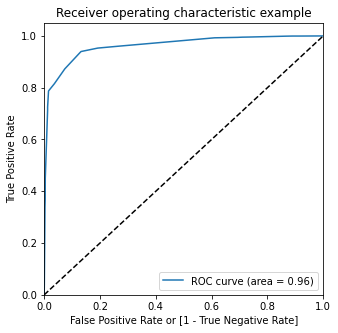

In [667]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### - Finding Optimal Cutoff Point
#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [668]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1467,1,0.993615,1,1,1,1,1,1,1,1,1,1,1
1,108,0,0.062122,0,1,0,0,0,0,0,0,0,0,0
2,7858,1,0.993615,1,1,1,1,1,1,1,1,1,1,1
3,5220,1,0.383896,0,1,1,1,1,0,0,0,0,0,0
4,3871,0,0.062122,0,1,0,0,0,0,0,0,0,0,0


In [669]:
#  accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.894486  0.940008  0.867040
0.2   0.2  0.895598  0.936629  0.870861
0.3   0.3  0.895598  0.936629  0.870861
0.4   0.4  0.906086  0.872835  0.926133
0.5   0.5  0.910377  0.787495  0.984463
0.6   0.6  0.910377  0.787495  0.984463
0.7   0.7  0.910377  0.787495  0.984463
0.8   0.8  0.910377  0.787495  0.984463
0.9   0.9  0.888924  0.724968  0.987774


<Figure size 1080x1080 with 0 Axes>

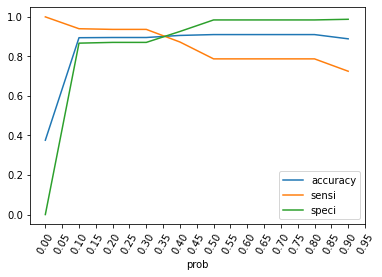

In [670]:
# plotting accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(15,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
ticks=np.arange(0,1,.05)
plt.xticks(ticks,rotation=60)

plt.show()

- From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [671]:
#Identifying final predicted value considering 0.38 as cutoff point
y_train_pred_final["final_predicted"] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1467,1,0.993615,1,1,1,1,1,1,1,1,1,1,1,1
1,108,0,0.062122,0,1,0,0,0,0,0,0,0,0,0,0
2,7858,1,0.993615,1,1,1,1,1,1,1,1,1,1,1,1
3,5220,1,0.383896,0,1,1,1,1,0,0,0,0,0,0,1
4,3871,0,0.062122,0,1,0,0,0,0,0,0,0,0,0,0


#### - Calculating Lead Score for training set

In [672]:
## create a  seperate  column as name Lead score and covert the values of converted prob desical to hundred after multiplying 100

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','ProspectID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,ProspectID,final_predicted,Lead_Score
0,1,0.993615,1467,1,99
1,0,0.062122,108,0,6
2,1,0.993615,7858,1,99
3,1,0.383896,5220,1,38
4,0,0.062122,3871,0,6


In [673]:
#Calculating accuracy of the model based on final predicted value
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9103766089305577

In [674]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3865   61]
 [ 503 1864]]


In [675]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [676]:
#sensitivity
TP / float(TP+FN)

0.7874947190536544

In [677]:
#Specificity
TN / float(TN+FP)

0.9844625573102395

In [678]:
# false postive rate - predicting COnverted when customer has not turned into paying customer
print(FP/ float(TN+FP))

0.01553744268976057


In [679]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8848443223443223


In [680]:
# Calculating Precision - TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9683116883116883

In [681]:
# Calculating Recall - TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7874947190536544

### - Precision and recall curve

In [682]:
from sklearn.metrics import precision_recall_curve

In [683]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6288    0
 6289    1
 6290    0
 6291    0
 6292    1
 Name: predicted, Length: 6293, dtype: int64)

In [684]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

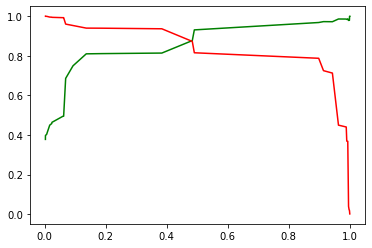

In [685]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on test set

- Since numerical columns 'TotalVisits', 'Total Time Spent on Website' were filtered out during feature selextion using RFE, there is no need to transform columns in test data set

In [686]:
X.columns

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Others_Occu', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [687]:
X_test = X_test[X.columns]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Others_Occu,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
8692,0,1,0,0,0,0,0,0,0,0,0,0,0
6126,0,1,0,0,0,0,0,0,0,0,0,1,0
5198,0,0,1,0,0,0,0,0,0,1,0,0,0
4979,0,1,0,0,0,0,0,0,0,0,0,0,0
9225,0,0,0,0,0,0,0,0,0,0,0,0,0


In [688]:
#adding constant to dataset
X_test_sm = sm.add_constant(X_test)

In [689]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [690]:
y_test_pred[:10]

8692    0.490458
6126    0.993615
5198    0.062122
4979    0.490458
9225    0.092822
3533    0.062122
2726    0.942997
3450    0.062122
7683    0.993615
6286    0.483776
dtype: float64

In [691]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [692]:
# Let's see the head
y_test_pred_1.head()

,0
8692,0.490458
6126,0.993615
5198,0.062122
4979,0.490458
9225,0.092822


In [693]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [694]:
y_test_df['ProspectID'] = y_test_df.index
y_test_df.head()

,Converted,ProspectID
8692,0,8692
6126,1,6126
5198,1,5198
4979,1,4979
9225,0,9225


In [695]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [696]:
y_pred_final.head()

,Converted,ProspectID,0
8692,0,8692,0.490458
6126,1,6126,0.993615
5198,1,5198,0.062122
4979,1,4979,0.490458
9225,0,9225,0.092822


In [697]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [698]:
y_pred_final = y_pred_final.reindex(['ProspectID','Converted','Convert_Prob'],axis=1)
y_pred_final

,ProspectID,Converted,Convert_Prob
8692,8692,0,0.490458
6126,6126,1,0.993615
5198,5198,1,0.062122
4979,4979,1,0.490458
9225,9225,0,0.092822
...,...,...,...
893,893,0,0.023823
3978,3978,1,0.383896
7402,7402,0,0.002377
1205,1205,0,0.062122


In [699]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [700]:
y_pred_final.head()

,ProspectID,Converted,Convert_Prob,final_predicted
8692,8692,0,0.490458,0
6126,6126,1,0.993615,1
5198,5198,1,0.062122,0
4979,4979,1,0.490458,0
9225,9225,0,0.092822,0


#### - calculating Lead Score for test set

In [701]:
## create a  seperate  column as name Lead score and covert the values of converted prob desical to hundred after multiplying 100

y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,ProspectID,Converted,Convert_Prob,final_predicted,Lead_Score
8692,8692,0,0.490458,0,49
6126,6126,1,0.993615,1,99
5198,5198,1,0.062122,0,6
4979,4979,1,0.490458,0,49
9225,9225,0,0.092822,0,9


In [702]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9169755374351372

In [703]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1640,   26],
       [ 198,  834]])

In [704]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [705]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8081395348837209

In [706]:
# Let us calculate specificity
TN / float(TN+FP)

0.9843937575030012

In [707]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    834
0    198
Name: final_predicted, dtype: int64

## Conclusion

### Evaluation Matrix -
#### Training Data Set:
- Accuracy:    91.03%
- Sensitivity: 78.75%
- Specificity: 98.4%

#### Test Data Set:
- Accuracy:    91.69%
- Sensitivity: 80.81%
- Specificity: 98.4%
### Summary - 
- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across training and test dataset.
- Sensitivity is almost 80% , so we can say our model performed really well and met the expectation.
- Tags_Closed by Horizzon, Tags_Lost to EINS and Lead Source_Welingak Website are the top three features which help predicting which leads would convert into paying customers.
- Some other features who positively impacted the conversion are Tags_Will revert after reading the email and Last Notable Activity_SMS Sent.
        
       